#**Airlines' Delay and Cancellation Exploration**

####-  *Gauri Jadhav*

#**Investigation Overview**
> This presentation explores the flights dataset that reports cancelled and delayed flights in the United States with the reasons for cancellation and delays, from January 2003 to April 2023.


#**Dataset Overview**
> The dataset has 338371 flight details with 21 features. The data ranges from 2003 to 2023.                      
The variables in the dataset contains information about airline flights delaying reasons to airports, including carriers, cancellation, arrival and diverted,delay (and cause of delays) etc.                                                                           
Also, a flight is considered delayed when its arrival delay by 15 minutes.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
# I have already cleaned the dataset in the exploratory data analysis,
# Directly loading the clean dataset into the pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Data/Airline_Delay_Cause_clean.csv')

In [ ]:
df.shape

(338371, 21)

#**Cancelled flights**

#Distribution of Cancelled flights by reason

- Most of the flights `(34.37%)` were cancelled due to **late aircraft** reasons followed by **national aviation system** reasons `(32.52%)`.      
- **Security** reasons account the negligible proportion `(0.25%)` of cancelled flights.

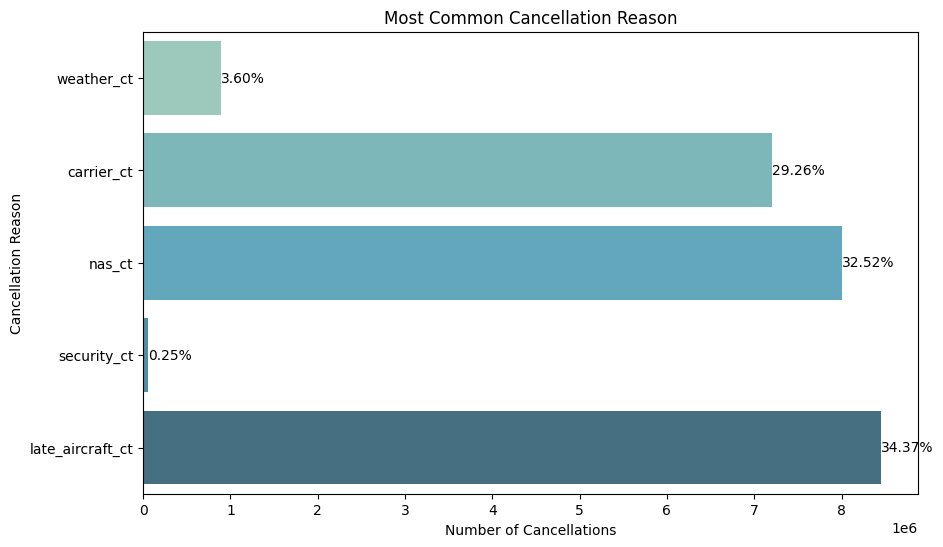

In [ ]:
blue_color = sb.color_palette("GnBu_d")

cancellation_reason_counts = df[['weather_ct', 'carrier_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()

plt.figure(figsize=(10, 6))
ax = sb.barplot(x=cancellation_reason_counts.values, y=cancellation_reason_counts.index, palette=blue_color)

for i, value in enumerate(cancellation_reason_counts.values):
    percentage = (value / cancellation_reason_counts.sum()) * 100
    ax.text(value + 0.1, i, f'{percentage:.2f}%', va='center', fontsize=10)

plt.title('Most Common Cancellation Reason')
plt.xlabel('Number of Cancellations')
plt.ylabel('Cancellation Reason')
plt.show()

###Comparison of Cancellation Rates by Airline and Month

* Cancellation rates are higher in the *winter* months of *December-February* across most airlines. This is likely due to worse winter weather.
* **Southwest (WN)** has the lowest cancellation rates overall, with most months under `2%`. This indicates very reliable operations.
* **ExpressJet (EV)** and **Envoy Air (MQ)** have higher cancellation rates than major carriers, often over `5%` in winter months. As regional airlines, they likely face greater operational challenges.
* **American Airlines (AA)** and **United Airlines (UA)** have moderate cancellation rates in the` 2-4%` range on average.

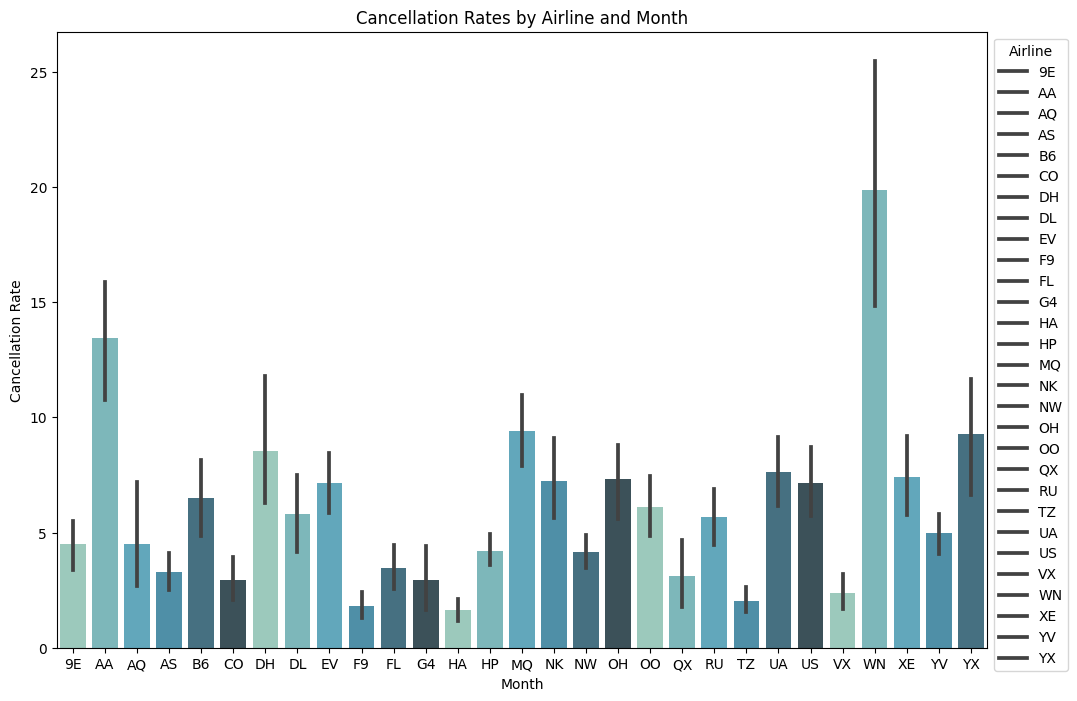

In [ ]:
cancellation_rates = df.groupby(['carrier', 'month'])['arr_cancelled'].mean().reset_index()

cancellation_reshape = cancellation_rates.pivot(index='month', columns='carrier', values='arr_cancelled')

plt.figure(figsize=(12, 8))
sb.barplot(data=cancellation_reshape, palette=blue_color)
plt.title('Cancellation Rates by Airline and Month')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.legend(title='Airline', loc='upper left', bbox_to_anchor=(1, 1),labels=cancellation_reshape.columns)
plt.show();

#Proportion of Cancelled flights per Airline

- The **G4** has the highest proportion of cancelled flights by `4.04%`.
- Though **HA** airline has less flight cancelled than other airlines, it cancelled `0.48%` of its flights.

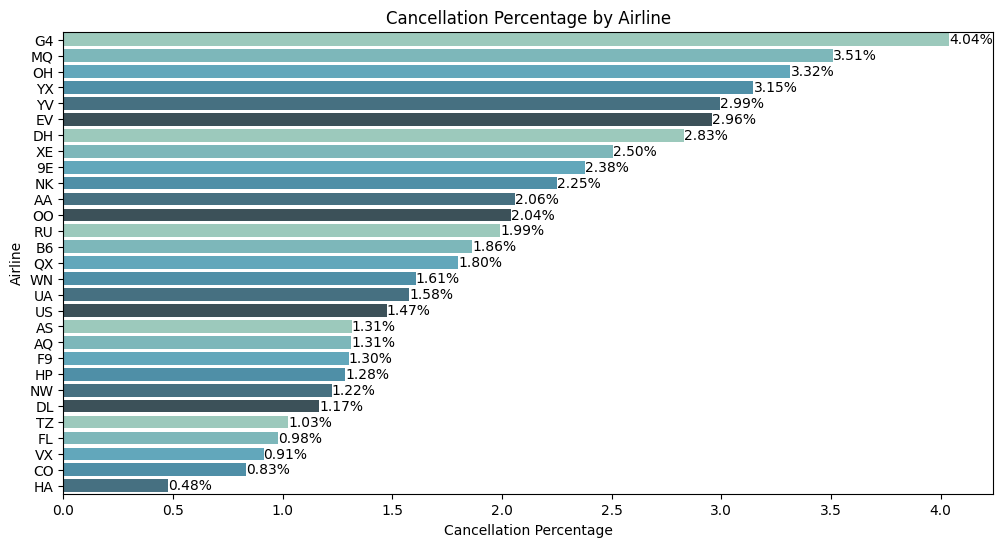

In [ ]:
total_flights_by_airline = df.groupby('carrier')['arr_flights'].sum()
canceled_flights_by_airline = df.groupby('carrier')['arr_cancelled'].sum()

cancelation_percentage_by_airline = (canceled_flights_by_airline / total_flights_by_airline) * 100

cancelation_percentage_df = pd.DataFrame({
    'Carrier': cancelation_percentage_by_airline.index,
    'Cancellation Percentage': cancelation_percentage_by_airline.values
})

cancelation_percentage_df = cancelation_percentage_df.sort_values(by='Cancellation Percentage', ascending=False)

plt.figure(figsize=(12, 6))
sb.barplot(x='Cancellation Percentage', y='Carrier', data=cancelation_percentage_df, palette=blue_color)

# Adding text annotations
for index, value in enumerate(cancelation_percentage_df['Cancellation Percentage']):
    plt.text(value, index, f'{value:.2f}%', ha='left', va='center', fontsize=10)

plt.title('Cancellation Percentage by Airline')
plt.xlabel('Cancellation Percentage')
plt.ylabel('Airline')
plt.show()

#**Delayed flights**

# Proportation for reason for delay

* The maximum proportion (37.37%) of delay is caused by **Late Aircraft delay**. The **Late Aircraft delay** also causes the maximum average delay `26.8729 hours` (~161237 minutes).

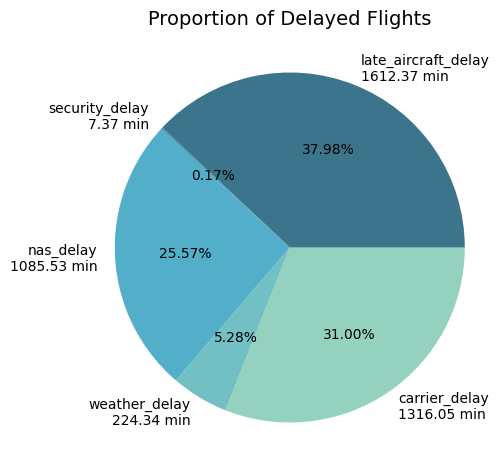

In [ ]:
plt.figure(figsize=(10, 5))

means = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].mean()
labels = []
for i, j in enumerate(['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']):
    label = f'{j}\n{means[i]:.2f} min'
    labels.append(label)

color =blue_color
plt.pie(means, labels=labels, counterclock=False, autopct='%.2f%%',colors = color)
plt.axis('square')
plt.title('Proportion of Delayed Flights\n', fontsize=14)

plt.show()

#Delayed flights reason by months

* *Weather delay*s account for the highest percent of delays in **December, January and February** - over `40%` during *winter* months. This matches expectations as winter storms are most frequent and disruptive.
* *Air carrier delays* like mechanical issues, crew problems etc. consistently account for `25-35%` across all months.
* *National Aviation System (NAS)* delays spike in **August** where they account for `30%` of delays indicating more air traffic congestion issues during *summer*.
* *Security and late aircraft delays* contribute a relatively `small proportion` monthly. Each causes less than `10%` of delays in all months.

<Figure size 1200x800 with 0 Axes>

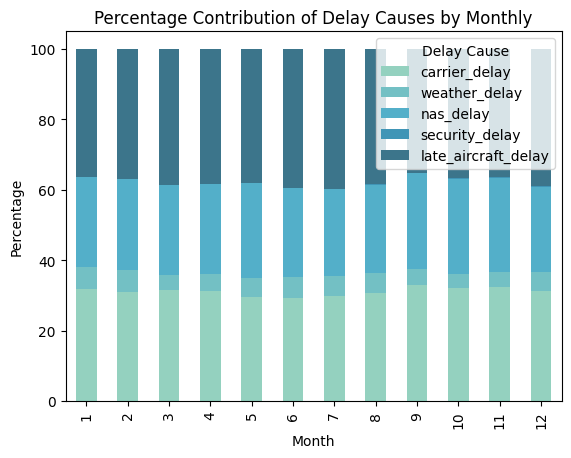

In [ ]:
blue_color = sb.color_palette("GnBu_d")

delay_causes_by_every_month = df.groupby('month')[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum()

total_delay_monthly = delay_causes_by_every_month.sum(axis=1)

delay_causes_percent = delay_causes_by_every_month.divide(total_delay_monthly, axis=0) * 100

plt.figure(figsize=(12, 8))
delay_causes_percent.plot(kind='bar', stacked=True, color=blue_color)

plt.title('Percentage Contribution of Delay Causes by Monthly')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.legend(title='Delay Cause', loc='upper right')
plt.show();

#Arrival Delays by Weather Conditions

* There is a `positive correlation` between *weather delay* and *arrival delay*.
* Flights with *longer weather delays* also tend to have *longer arrival delays*.
The regression line has a `positive slope`, reflecting this *positive relationship*.
* *longer weather delays* contribute to *longer arrival delays* so there is a `moderate positive correlation`. But weather alone does not fully explain overall arrival delays.

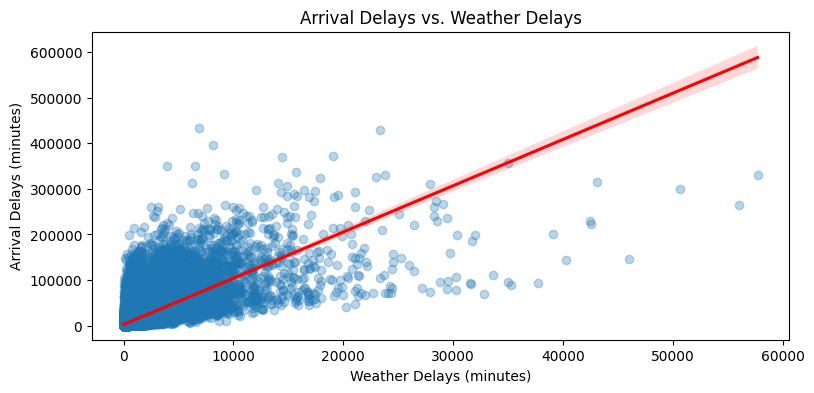

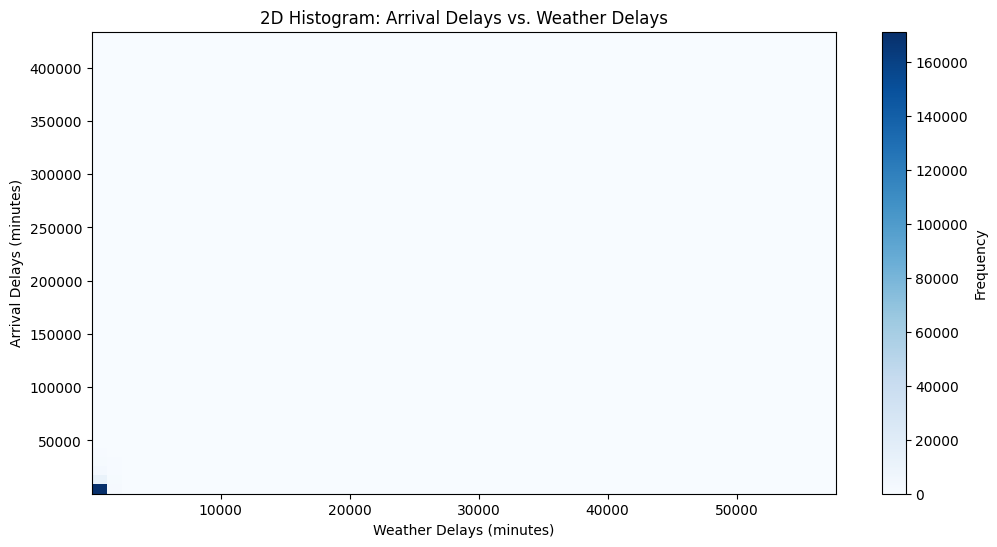

In [ ]:
weather_delays_df = df[df['weather_delay'] > 0]

plt.figure(figsize=(9, 4))
sb.regplot(x='weather_delay', y='arr_delay', data=weather_delays_df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Arrival Delays vs. Weather Delays')
plt.xlabel('Weather Delays (minutes)')
plt.ylabel('Arrival Delays (minutes)')

plt.show()

plt.figure(figsize=(12, 6))
plt.hist2d(weather_delays_df['weather_delay'], weather_delays_df['arr_delay'], bins=(50, 50), cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('2D Histogram: Arrival Delays vs. Weather Delays')
plt.xlabel('Weather Delays (minutes)')
plt.ylabel('Arrival Delays (minutes)')

plt.show()

#Correlation b/w delays

* **Carrier delays** have the `highest correlation` with **late aircraft delays** `(0.84)`, indicating they share the most common causes like maintenance, crew issues.
* **Weather delays** `correlate most strongly` with **carrier delays** `(0.72)` and **NAS delays** `(0.56)`. This reflects that adverse weather conditions disrupt airline operations and national air traffic.
* **NAS delays** have moderately `high correlations` with all delay types since air traffic issues can propagate across airlines and airports.
* **Security delays** have relatively `low correlation` across all delay types. Most other delays are unrelated to security screening procedures.
* The *strongest* overall association is between **carrier** and **late aircraft delays**, as both directly relate to internal airline operations like flight/crew scheduling.
* The *weakest* association is between **security delays** and **weather delays** since security checks are largely insulated from external weather factors

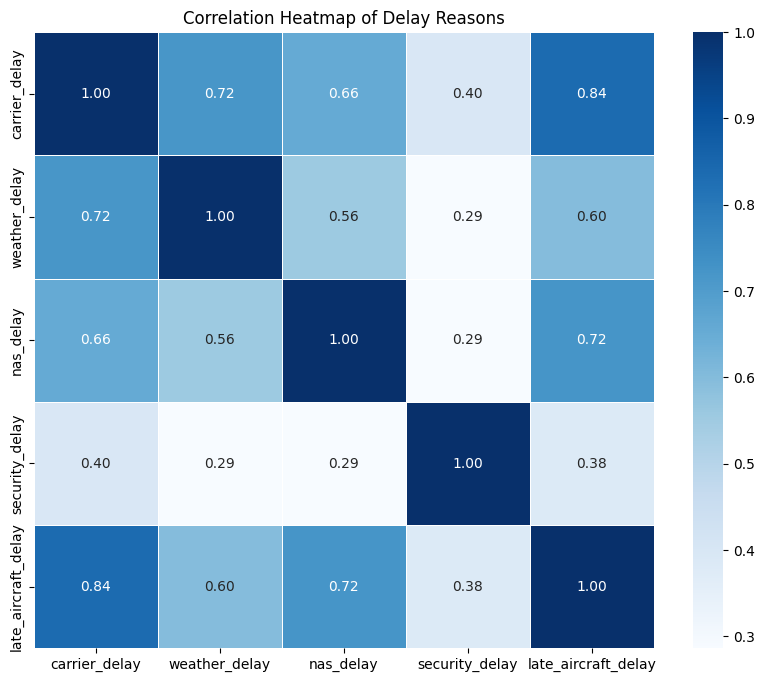

In [ ]:
delay_columns = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

delay_data = df[delay_columns]

delay_correlation = delay_data.corr()

plt.figure(figsize=(10, 8))
sb.heatmap(delay_correlation, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Delay Reasons')
plt.show()
#print(delay_correlation)

# Number of airline-related delays across different airlines

>The top 5 airlines by airline-related delay are:
* SkyWest Airlines Inc.: 39760 delays
* United Air Lines Inc.: 19799 delays
* ExpressJet Airlines Inc.: 23964 delays
* Southwest Airlines Co.: 18731 delays
* American Airlines Inc.: 20868 delays

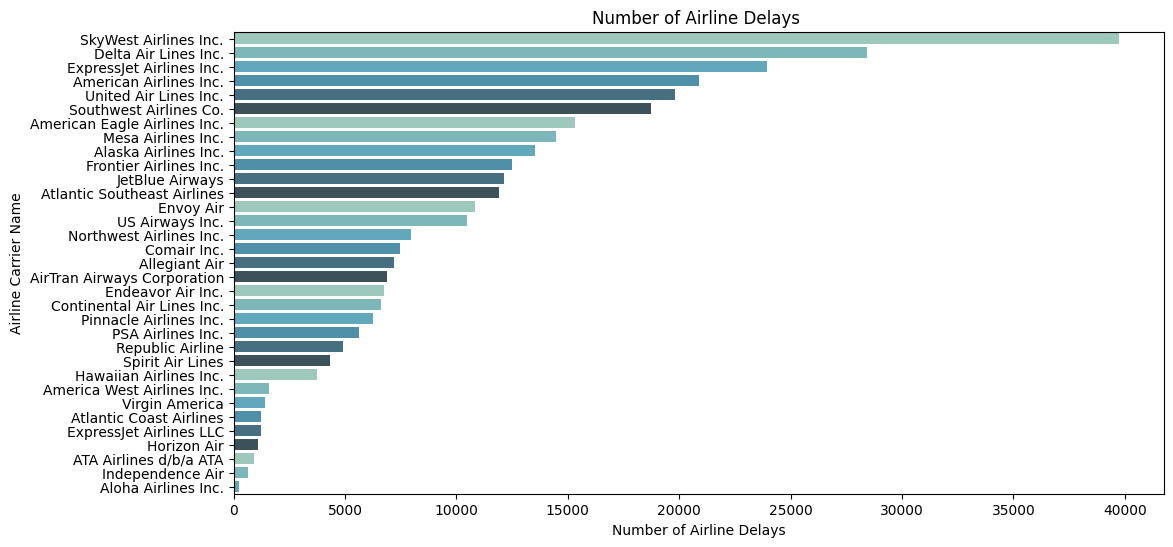

In [ ]:
delayed_flights = df[df['arr_delay'] > 0]
airline_delays = delayed_flights.groupby('carrier_name')['arr_delay'].count().reset_index()
airline_delays.rename(columns={'arr_delay': 'No_of_AIRLINE_Delays_By_Airline'}, inplace=True)

#print(airline_delays)
plt.figure(figsize=(12, 6))
sb.barplot(x='No_of_AIRLINE_Delays_By_Airline', y='carrier_name', data=airline_delays.sort_values(by='No_of_AIRLINE_Delays_By_Airline', ascending=False), palette=blue_color)
plt.title('Number of Airline Delays ')
plt.xlabel('Number of Airline Delays')
plt.ylabel('Airline Carrier Name')
plt.show()